# Lead Pouring for Nerds
## Adjustable Parameters

In [1]:
# Number of qubits. More pictures / finer gradient in merged picture, but longer waiting time.
qubits=12
# Number of shots, these will define the resolution of the created images.
shots=6400
# Use simulator, only for testing.
use_simulator = False

## Instructions
Just run all cells, and take care to concentrate on your question when your circuit is executed (see below)!
Then look at the produced images and try to make out shapes.

In [2]:
# Setup Dependencies
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from qiskit.tools.monitor import job_monitor
from qiskit.providers.ibmq import least_busy
import math
# Loading your IBM Q account(s)
provider = IBMQ.load_account()
%matplotlib inline

/opt/conda/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


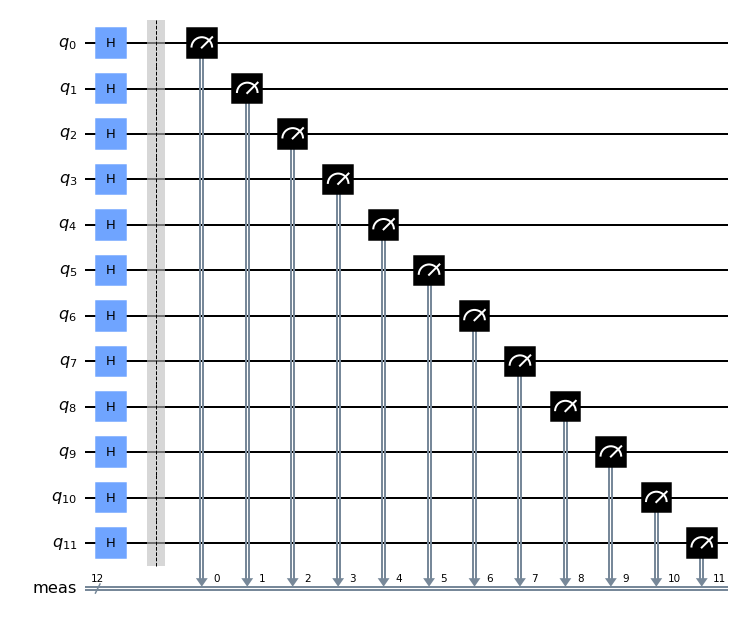

In [3]:
# Setup Quantum Circuit
circ = QuantumCircuit(qubits)
for i in range(qubits):
    circ.h(i)
circ.measure_all()
circ.draw(output='mpl')

In [4]:
provider = IBMQ.get_provider(group='open')
#provider.backends()

## Actual execution
At this point, check the status of your job, and concentrate on your question when it runs. 

In [5]:
if (use_simulator):
    backend = Aer.get_backend('qasm_simulator')
else:
    backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= qubits and 
                                           x.configuration().max_shots>=shots and
                                       not x.configuration().simulator and x.status().operational==True))
print("Running on current least busy device: ", backend)
print("As soon as the experiment runs, concentrate on your question!")
# Execute the Result
job = execute(circ, backend, shots=shots, memory=True)
job_monitor(job, interval = 2)


Running on current least busy device:  ibmq_16_melbourne
As soon as the experiment runs, concentrate on your question!
Job Status: job has successfully run


In [6]:
mem = job.result().get_memory(circ)

# Final Visualization
There will be two results:
1. One image using the qubits as colour gradient will be produced.
   This may be affected by correlation between the bits. Each pixel corresponds to one shot.
2. One picture by Qubit. Each pixel inside will correspond to one shot. 

Note there is no correction of any noise done with Ignis! 

The expectation would be good randomness, with some possibly visible systematics dependent on machine and Qubit, e.g. some Qubits show a statistical preference towards one value, and some Qubits have some coupling.

Can you detect some patterns in the randomness?

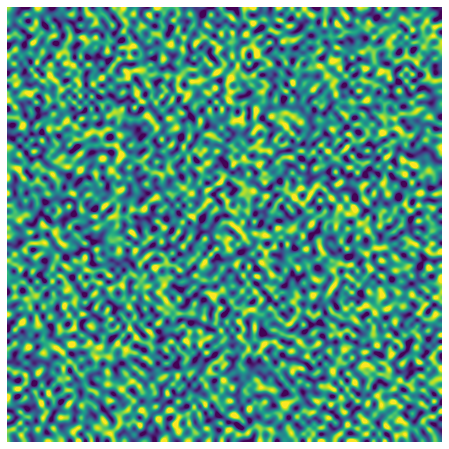

<Figure size 288x288 with 0 Axes>

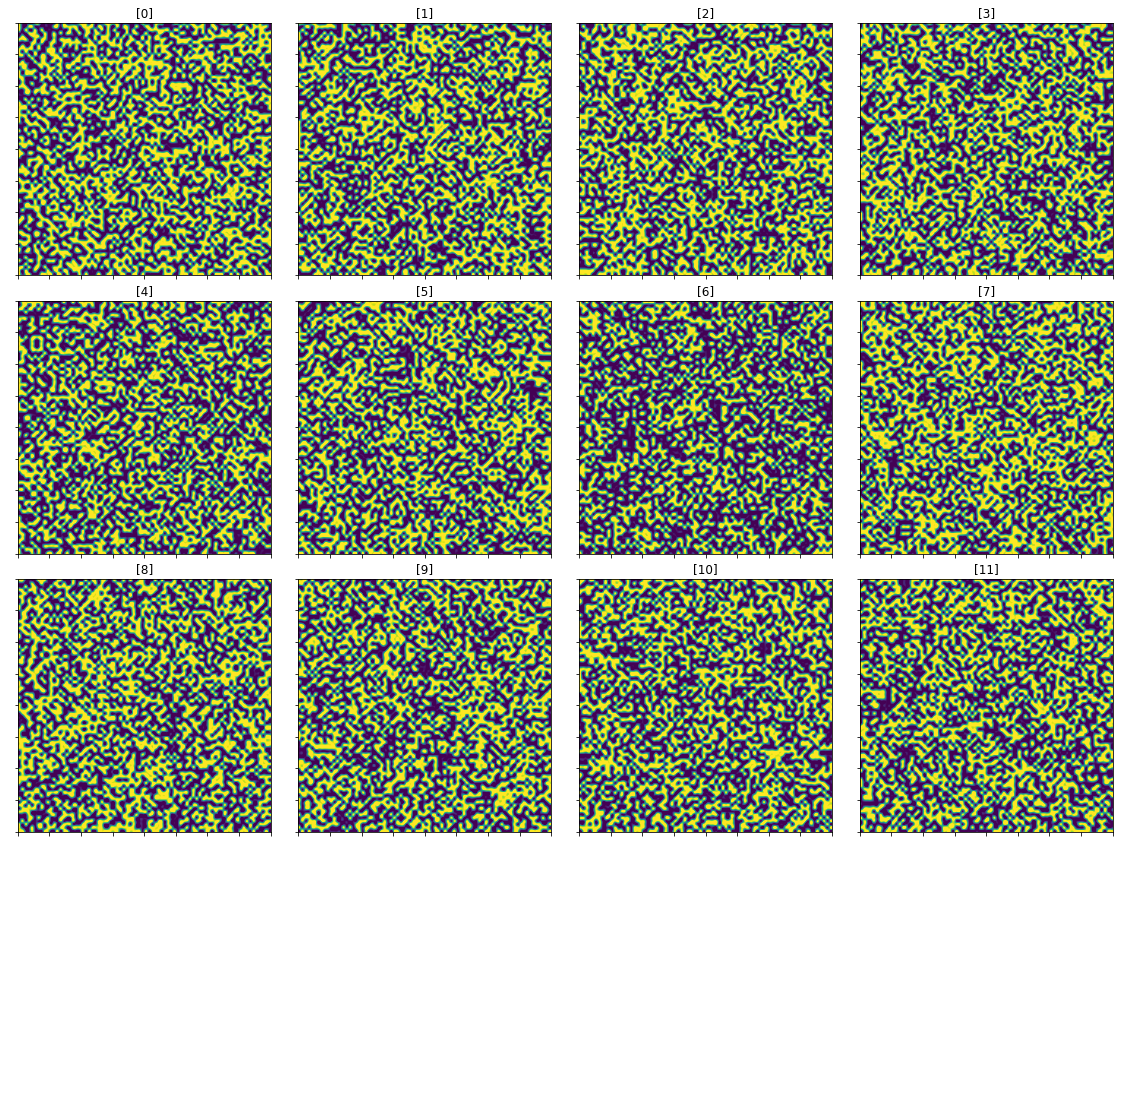

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

width=int(math.sqrt(shots))
height=int(math.sqrt(shots))

mem_ints = list(map(lambda x: int(x,2), mem))
arr_ints = np.array(mem_ints).reshape(width, height)

plt.figure(figsize = (8,8))
plt.imshow(arr_ints, extent=(0, width, 0, height),
           interpolation='lanczos')
plt.axis('off')
plt.show()

plt.figure(figsize = (4,4))
grid_length=math.ceil(math.sqrt(qubits))
gs1 = gridspec.GridSpec(grid_length, grid_length)
gs1.update(wspace=0.025, hspace=0.1)

fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(20, 20), subplot_kw={'xticks': [], 'yticks': []})
for qubit in range(0,qubits):
    mem_qubit = list(map(lambda x: int(x[qubit],2), mem))
    arr_qubit = np.array(mem_qubit).reshape(width, height)
    ax1 = plt.subplot(gs1[qubit])
    plt.axis('on')
    ax1.set_xticklabels([])
    ax1.set_yticklabels([])
    ax1.imshow(arr_qubit, extent=(0, width, 0, height), interpolation='lanczos')
    ax1.set_title("["+str(qubit)+"]")
for remnant in range(qubits,grid_length*grid_length):
    ax1 = plt.subplot(gs1[remnant])
    ax1.set_axis_off()

plt.show()